#HW7 Planning and Learning


##environment
The grid world size is 10*5 like following, black color and edge represent walls, every transition get reward = -10.
After 200 episodes, the part of wall will collapse.

parameters:

discounted rate = 1.0

learning rate = 0.1

epsilon = 0.001

total_episode = 1000

planning_times = 5

In [ ]:
GAMMA = 1.0
ALPHA = 0.1
EPSILON = 0.001
WORLD_SIZE = [5,10]
S0 = [0, 0]
ST = [4, 0]
max_episode=1000
planning_times = 5
# left, up, right, down
ACTIONS = [[0, -1], [-1, 0], [0, 1], [1, 0]] # left, up, right, down

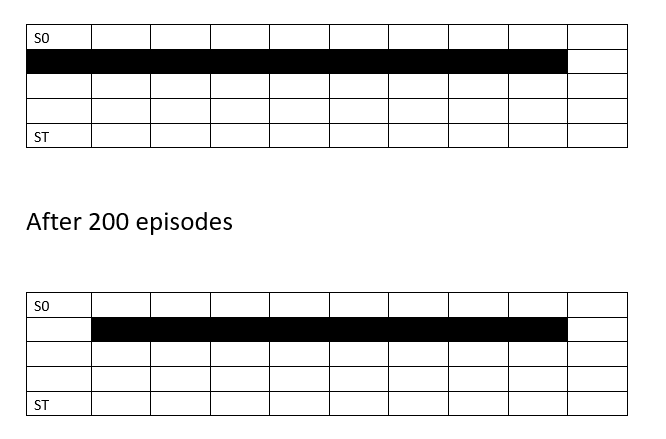

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rd
from collections import defaultdict


In [ ]:
# Environment
def step(state, action, epi):
  WALL = [[1,i]for i in range(9)]
  if epi > max_episode*0.2:
      WALL =  [[1,i]for i in range(1,9)]
  state_n = np.array(state) + np.array(action)
  state_n = [np.clip(state_n[0],0,4),np.clip(state_n[1],0,9)]
  state_n = state if state_n in WALL else state_n
  reward = -10
  return [state_n, reward]

In [ ]:
def chooseAction(state, qtable, epsilon):
  if rd.rand()>=epsilon:
    return np.argmax(qtable[state[0],state[1]])
  else:
    return rd.randint(4)

In [ ]:
def dyna_q():
    qtable = np.zeros([5, 10, 4])
    model = defaultdict(dict)
    returns = []
    for episode in range(max_episode):
        #### your code here ######
        epsilon = EPSILON
        state = S0
        G = 0

        while state != ST:
                  
            action = chooseAction(state,qtable,epsilon)            
            state_n , reward = step(state,ACTIONS[action],episode)          

            x , y = state
            x2 , y2 = state_n
            a = action
            a2 = np.argmax(qtable[x2][y2])
            qtable[x][y][a] = qtable[x][y][a] + ALPHA*(reward+GAMMA*qtable[x2][y2][a2]-qtable[x][y][a])

            state = state_n
            G += reward
            model[(x,y)][a] = [reward,(x2,y2)]

            for k in range(planning_times):
              _ = np.random.permutation(list(model))
              state_prev = _[0]
              __ = np.random.permutation(list(model[tuple(state_prev)]))
              action_prev = __[0]
              reward_prev , state_n_prev = model[tuple(state_prev)][action_prev]

              x3 , y3 = state_prev
              x4 , y4 = state_n_prev
              a3 = action_prev
              a4 = np.argmax(qtable[x4][y4])
              qtable[x3][y3][a3] = qtable[x3][y3][a3] + ALPHA*(reward_prev+GAMMA*qtable[x4][y4][a4]-qtable[x3][y3][a3])

        returns.append(G)
        ##########################

    return returns

In [ ]:
# use kappa = 0.1
def dyna_q_plus():
    qtable = np.zeros([5, 10, 4])

    model = defaultdict(dict)
    returns = []

    t_table = np.zeros([5, 10, 4])
    t = 0

    for episode in range(max_episode):
        #### your code here ####

        epsilon = EPSILON
        state = S0
        G = 0
        while state != ST:

            kappa = 0.1
            action = chooseAction(state,qtable,epsilon)            
            state_n , reward = step(state,ACTIONS[action],episode)          

            x , y = state
            x2 , y2 = state_n
            a = action
            a2 = np.argmax(qtable[x2][y2])
            qtable[x][y][a] = qtable[x][y][a] + ALPHA*(reward+GAMMA*qtable[x2][y2][a2]-qtable[x][y][a])

            state = state_n
            G += reward
            t += 1

            t_table += 1
            t_table[x][y][a] = 0
            model[(x,y)][a] = [reward,(x2,y2)]

            for k in range(planning_times):
              _ = np.random.permutation(list(model))
              state_prev = _[0]
              action_rand = np.random.randint(0,4)

              if action_rand in list(model[tuple(state_prev)]):

                reward_prev , state_n_prev = model[tuple(state_prev)][action_rand] 
              else:

                reward_prev = 0
                state_n_prev = state_prev

              x3 , y3 = state_prev
              x4 , y4 = state_n_prev
              a3 = action_rand
              a4 = np.argmax(qtable[x4][y4])
              
              reward_prev = reward_prev + kappa*np.sqrt(t_table[x3][y3][a3])
              qtable[x3][y3][a3] = qtable[x3][y3][a3] + ALPHA*(reward_prev+GAMMA*qtable[x4][y4][a4]-qtable[x3][y3][a3])

        returns.append(G)
        ##########################

    return returns

In [ ]:

def q_learning():
    qtable = np.zeros([5, 10, 4])
    returns = []
    for episode in range(max_episode):
        epsilon = EPSILON
        state = S0

        G = 0
        while state != ST:
            action = chooseAction(state, qtable, epsilon)
            state_n, reward = step(state, ACTIONS[action], episode)

            qtable[state[0], state[1], action] += ALPHA * (
                        reward + GAMMA * np.max(qtable[state_n[0], state_n[1]]) - qtable[state[0], state[1], action])

            state = state_n
            G += reward
        returns.append(G)

    return returns

# Experiment 1 (20%)
In dyna-Q+ algorithm line20 ,$\tau$ need to restart in every episode or restart in every simulation?please do the experiment and explain your answer.


Ans E1.

若 $\tau$ 在每次simulation才重新累積，環境改變後，於學習過程中發現更好的路徑時，那些新發現的路徑因為距離上次拜訪過了很久，因此會有很高的 $\tau$ 值去增加獎勵，加快學習速度。

然而，若於每個episode就重新累積 $\tau$ 值，當發生環境改變後，這種加快學習速度的獎勵值就會減少，因此學習速度相較於每次simulation才重新累積要來得更慢。

由下圖可看出 $\tau$ 在不同時機重新開始累積，學習曲線的變化。

$\bullet\;\tau\;restart\;in\;every\;episode$

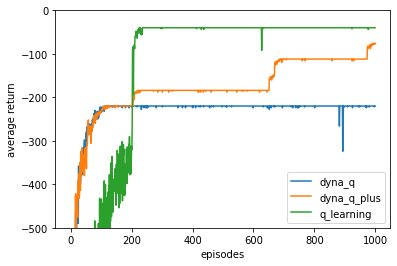

$\bullet\;\tau\;restart\;in\;every\;simulation$

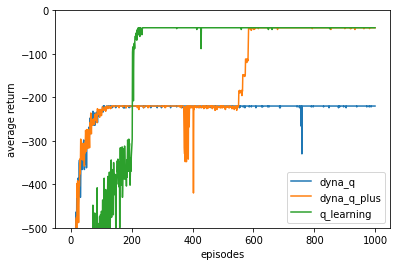

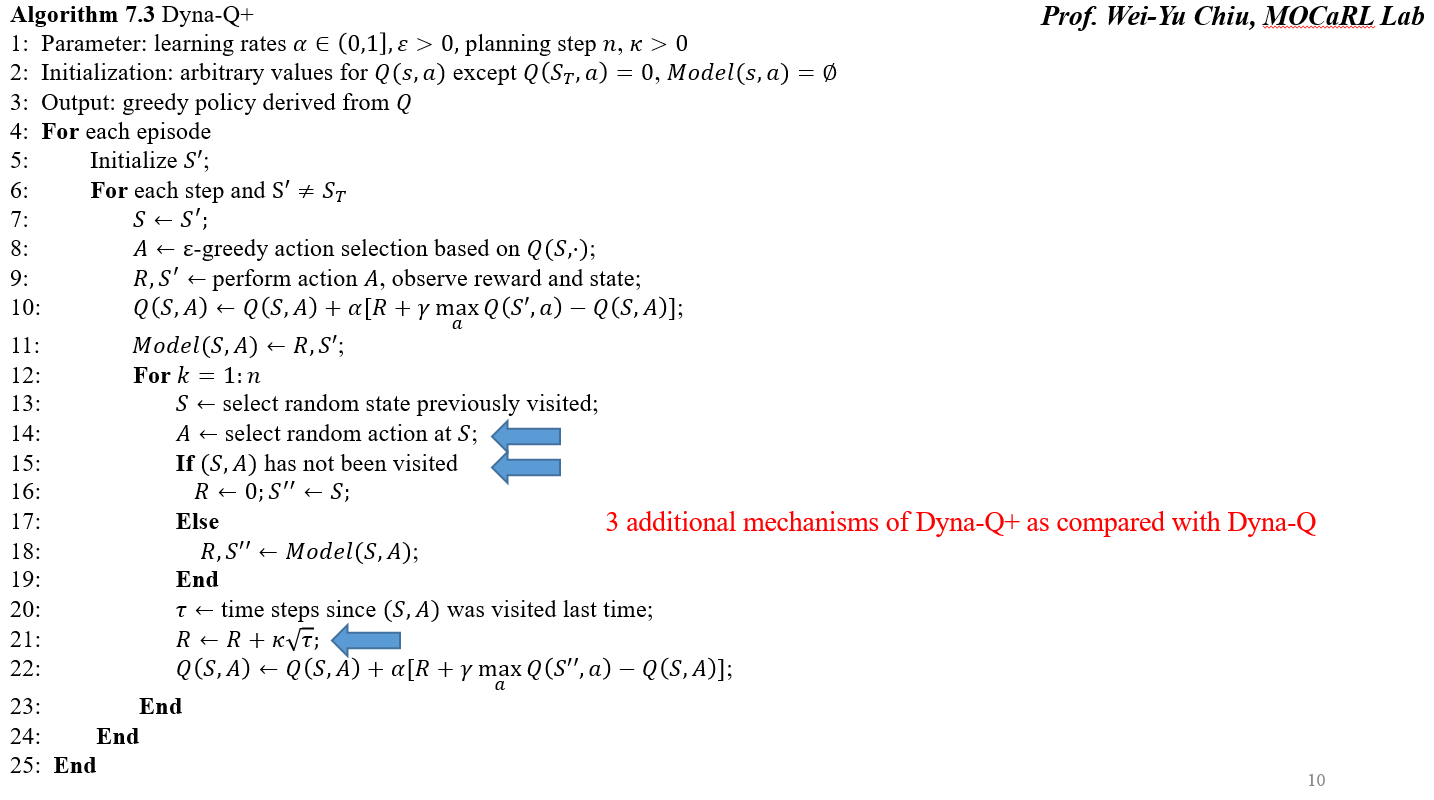

#Result(60%)
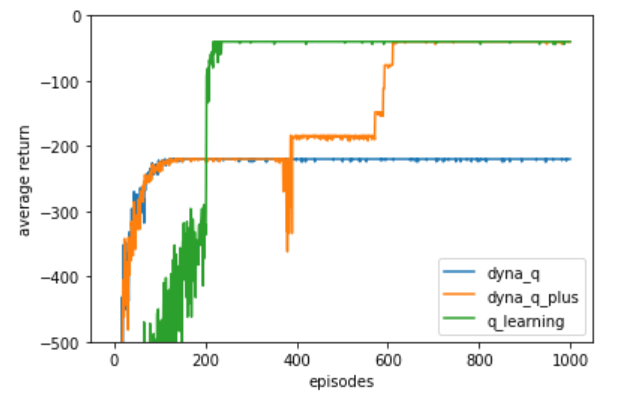

dyna_q
dyna_q_plus
q_learning


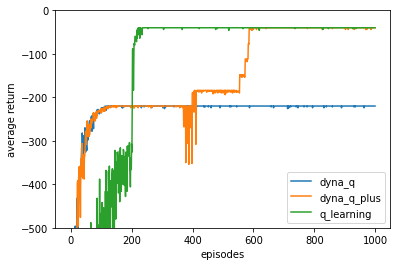

In [ ]:
simulation = 5
plt.plot(np.average([dyna_q() for i in range(simulation )],axis=0),label='dyna_q')
print('dyna_q')
plt.plot(np.average([dyna_q_plus() for i in range(simulation )],axis=0),label='dyna_q_plus')
print('dyna_q_plus')
plt.plot(np.average([q_learning() for i in range(simulation )],axis=0),label='q_learning')
print('q_learning')
plt.xlabel("episodes")
plt.ylabel('average return')
plt.ylim(-500, 0)
plt.legend()
plt.show()

# Question 1(20%)
Why Q-learning can react instantly when environment change?

Ans Q1.

由於Dyna-Q和Dyna-Q+在學習過程中會建立模型，在加速學習速率時仰賴過去經驗，因此若當環境發生改變時，會因為模型與實際環境不同(模型不準確)，不利於尋找新捷徑(exploration)。

反之，因為Q-learning沒有模型，因此在尋找新捷徑上速度較快，能夠更快適應新環境變化。

#Useful tool

In [ ]:
from collections import defaultdict
import numpy as np
model0 = {} #dictionary
model0[5] = 1 #key:5 value:1
print("corresponding value at key 5", model0[5])
model = defaultdict(dict)


model[(0,1)][1] = [-1,(1,2)] #when key (0,1) is empty, model[(0,1)] will be dictionary, can represent s, a, r, s_
model[(0,1)][2] = [-1,(1,3)]
model[(1,1)][3] = [-1,(0,1)]
model[(1,1)][4] = [-1,(0,5)]
print("key in model:", list(model))
print("How many element in model:",len(model))
_ = np.random.permutation(list(model))
print("Permutation key of dict:",_)
s = _[0]
print("Random select one key:",s)
print("value in key:",model[tuple(s)])
print("Actions in model[tuple(s)]:",list(model[tuple(s)]))
a = list(model[tuple(s)])[0]

print("reward and next state in model[tuple(s)][a]:",model[tuple(s)][a])


corresponding value at key 5 1
key in model: [(0, 1), (1, 1)]
How many element in model: 2
Permutation key of dict: [[1 1]
 [0 1]]
Random select one key: [1 1]
value in key: {3: [-1, (0, 1)], 4: [-1, (0, 5)]}
Actions in model[tuple(s)]: [3, 4]
reward and next state in model[tuple(s)][a]: [-1, (0, 1)]
